In [2]:
import csv
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.stats import sem
import pandas as pd
# import PCA
from sklearn.decomposition import PCA

In column 1, convert 'MEL' to 1 and 'SEK' to 0. 
In column 6, convert TRUE to 1, FALSE to 0.
In column 8, convert TRUE to 1, FALSE to 0.

In [3]:
# Define the columns to convert
cols_to_convert_mel_sek = [1]
cols_to_convert_bool = [6, 8]

# Load the data from features_output.csv
with open('features_output.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    data = list(reader)

# Convert 'MEL' to 1 and 'SEK' to 0 in column 1
data = [[row[0], int(row[1] == 'MEL'), *row[2:6], int(row[6] == 'TRUE'), *row[7:8], int(row[8] == 'TRUE'), *row[9:]] for row in data]
    
# Save the updated data to a new file called features_numeral.csv
with open('features_numeral.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    header = ['filename', 'diagnosis', 'asymmetry', 'border_irregularity', 'color_asymmetry', 'diameter_avg', 'smoke', 'age', 'itch']
    writer.writerow(header)
    writer.writerows(data)

All columns, except column 0 (img_id), into numpy array. 

In [4]:
with open('features_numeral.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # skip header row
    data = []
    for row in reader:
        data.append([float(val) if val != '' else np.nan for val in row[1:]])

X = np.array(data)
print(X.shape)
# print first 5 rows of X
print(X[:5,:])

(96, 8)
[[1.00000000e+00 2.69759598e-03 1.43526234e-03 1.00000000e+00
  1.00000000e+01 1.00000000e+00 7.80000000e+01 0.00000000e+00]
 [1.00000000e+00 9.42314069e-03 5.69996012e-03 5.00000000e+00
  2.15000000e+01 0.00000000e+00 4.90000000e+01 0.00000000e+00]
 [1.00000000e+00 3.27858343e-02 3.80877008e-03 3.00000000e+00
  8.50000000e+00 0.00000000e+00 4.60000000e+01 1.00000000e+00]
 [1.00000000e+00 2.07655131e-02 2.38105263e-03 1.00000000e+00
  8.50000000e+00 0.00000000e+00 4.60000000e+01 1.00000000e+00]
 [1.00000000e+00 5.18957053e-02 5.15493015e-03 6.00000000e+00
  1.25000000e+01 0.00000000e+00 5.80000000e+01 0.00000000e+00]]


Output normalized data into features_normalized.csv

In [5]:
# Define the indices of the columns to normalize
cols_to_normalize = [1, 2, 3, 4, 6]

# Extract the columns to normalize
X_to_normalize = X[:, cols_to_normalize]

# Create the scaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
X_normalized = scaler.fit_transform(X_to_normalize)

# Replace the normalized columns in X with the scaled values
X[:, cols_to_normalize] = X_normalized

# Output the normalized data to a new file called features_normalized.csv
with open('features_normalized.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    header = ['diagnosis', 'asymmetry', 'border_irregularity', 'color_asymmetry', 'diameter_avg', 'smoke', 'age', 'itch']
    writer.writerow(header)
    writer.writerows(X)

Visualize the difference between MEL and SEK in terms of 6 features from Raw data.

               filename  diagnosis  asymmetry  border_irregularity  \
0  PAT_680_1289_182.png          1   0.002698             0.001435   
1    PAT_995_1867_5.png          1   0.009423             0.005700   
2  PAT_966_1825_584.png          1   0.032786             0.003809   
3  PAT_966_1825_546.png          1   0.020766             0.002381   
4    PAT_495_941_26.png          1   0.051896             0.005155   

   color_asymmetry  diameter_avg  smoke  age  itch  
0                1          10.0      1   78     0  
1                5          21.5      0   49     0  
2                3           8.5      0   46     1  
3                1           8.5      0   46     1  
4                6          12.5      0   58     0  


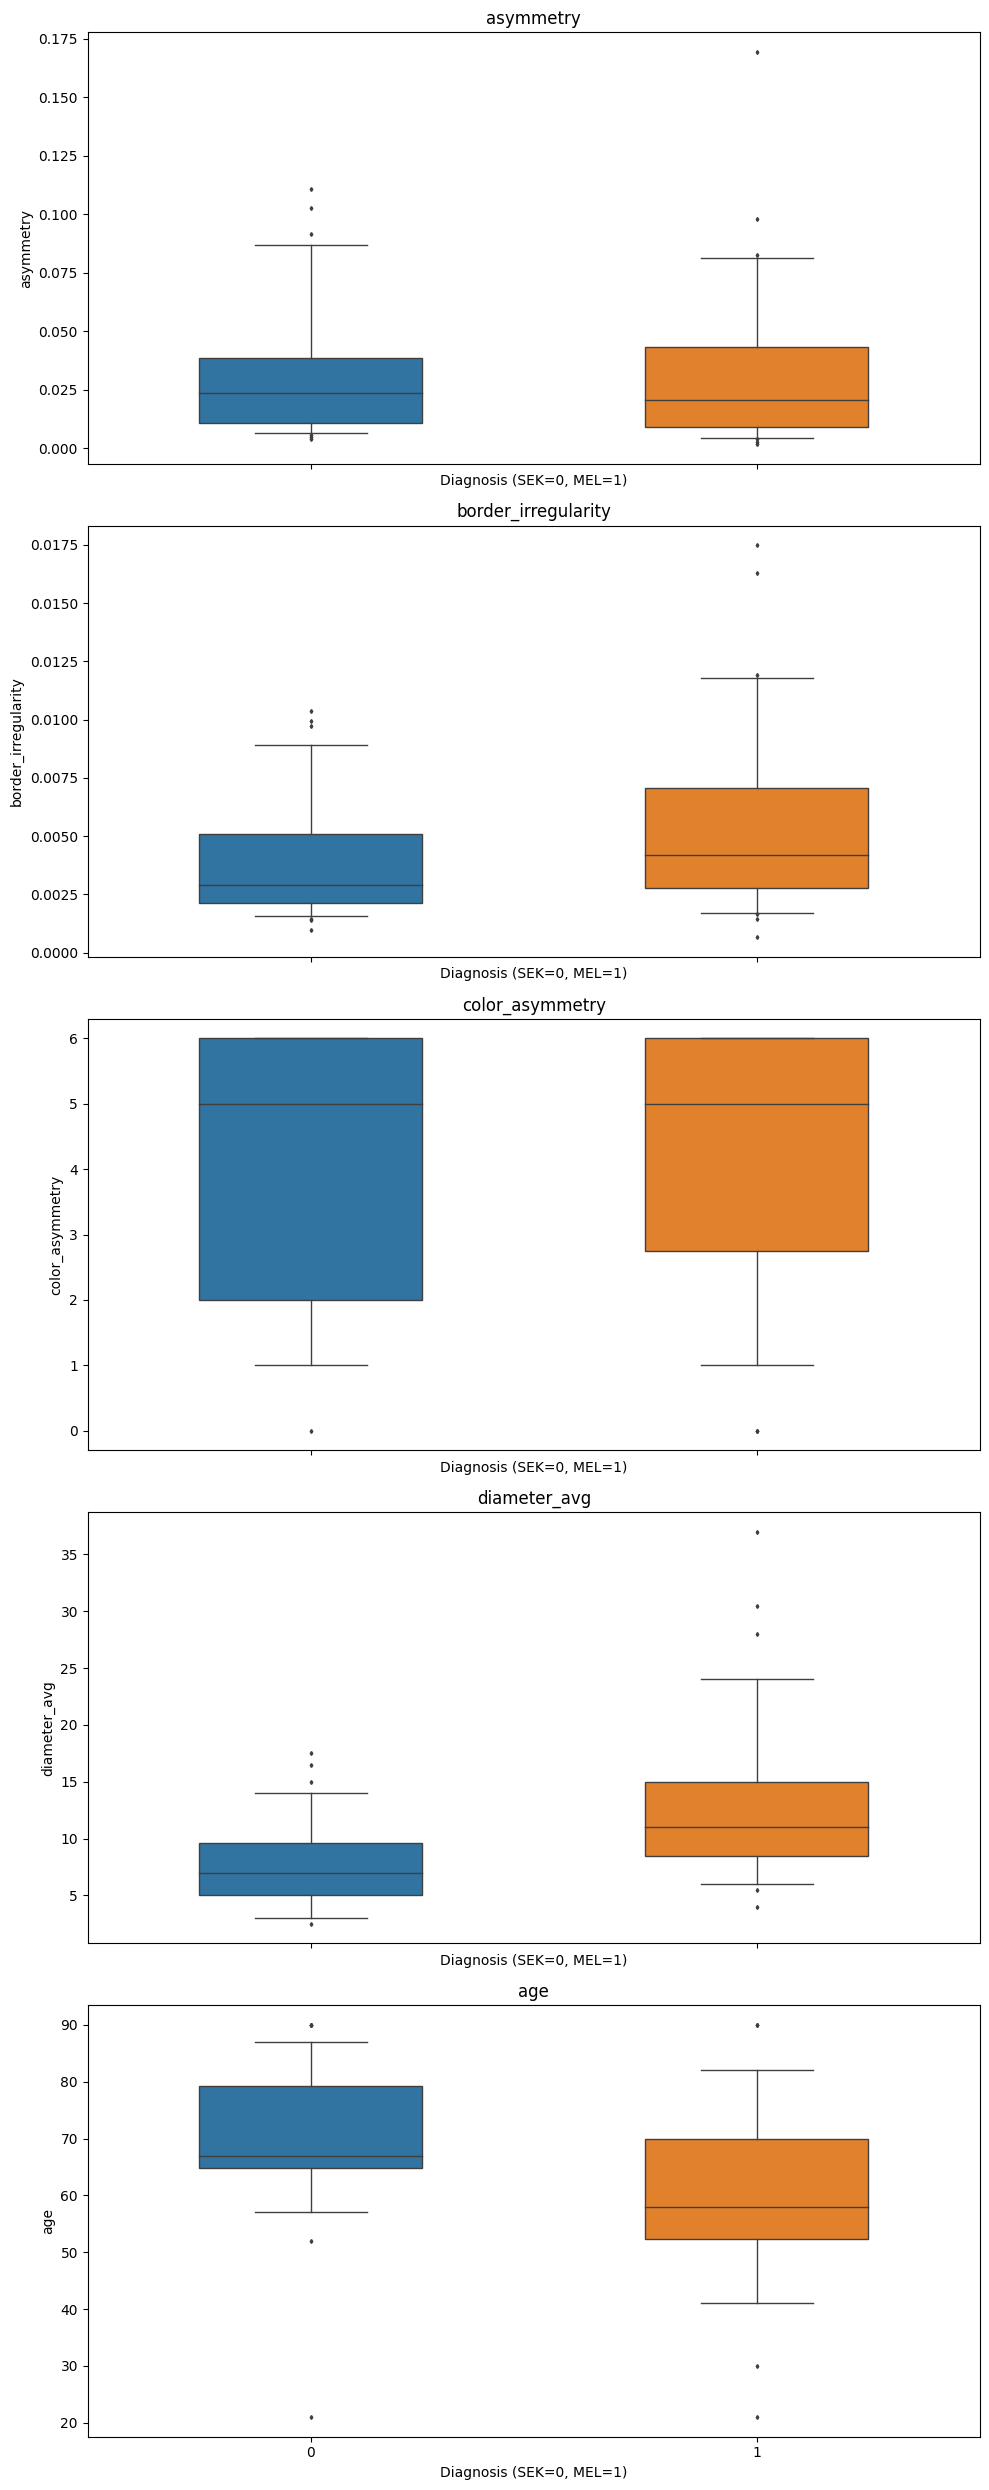

In [6]:
# Load the data into a pandas DataFrame
data = pd.read_csv('features_numeral.csv')
print(data.head())

# Define the columns to plot
cols_to_plot = ['asymmetry', 'border_irregularity', 'color_asymmetry', 'diameter_avg', 'age']

# Create a new figure and axis for each plot
fig, axes = plt.subplots(len(cols_to_plot), 1, figsize=(10, 5 * len(cols_to_plot)), sharex=True)

# Loop through each column and plot a boxplot
for i, col in enumerate(cols_to_plot):
    # Create the boxplot
    sns.boxplot(x='diagnosis', y=str(col), data=data, ax=axes[i], whis=[5, 95], width=0.5, linewidth=1, fliersize=2)

    # Set the axis labels and title
    axes[i].set_xlabel('Diagnosis (SEK=0, MEL=1)')
    axes[i].set_ylabel(f'{col}')
    axes[i].set_title(f'{col}')

# Set the x-axis tick labels
axes[-1].set_xticklabels(['0', '1'])

# Show the plots
plt.tight_layout()
plt.show()

Visualize the difference between MEL and SEK in terms of 6 features from Normalized data.

   diagnosis  asymmetry  border_irregularity  color_asymmetry  diameter_avg  \
0        1.0  -0.974806            -1.015085        -1.417658     -0.098409   
1        1.0  -0.740246             0.317231         0.453066      1.743006   
2        1.0   0.074552            -0.273587        -0.482296     -0.338593   
3        1.0  -0.344669            -0.719615        -1.417658     -0.338593   
4        1.0   0.741029             0.146961         0.920747      0.301899   

   smoke       age  itch  
0    1.0  0.977910   0.0  
1    0.0 -1.101923   0.0  
2    0.0 -1.317078   1.0  
3    0.0 -1.317078   1.0  
4    0.0 -0.456458   0.0  


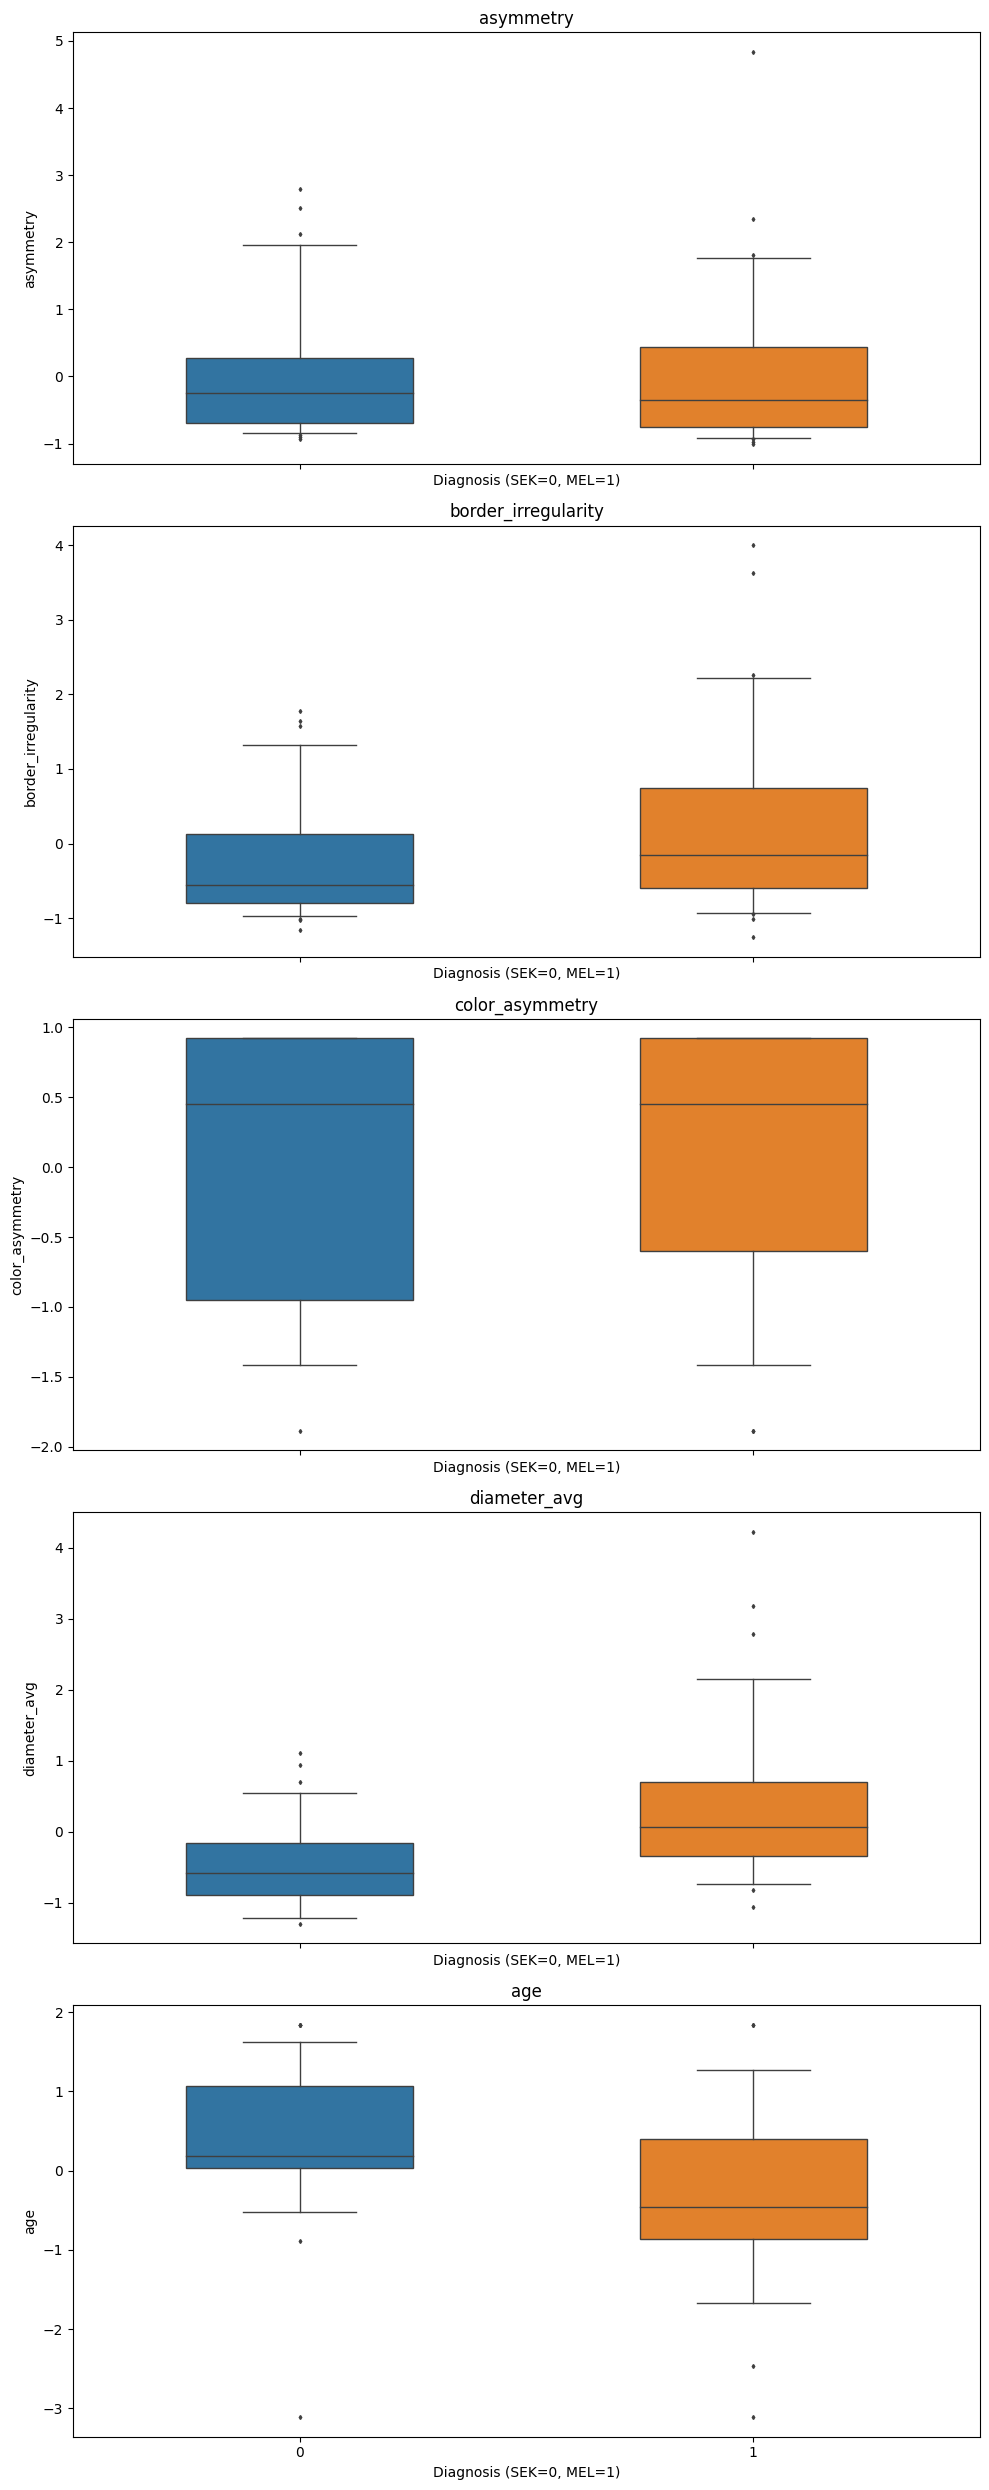

In [7]:
# Load the data into a pandas DataFrame
data = pd.read_csv('features_normalized.csv')
print(data.head())

# Define the columns to plot
cols_to_plot = ['asymmetry', 'border_irregularity', 'color_asymmetry', 'diameter_avg', 'age']

# Create a new figure and axis for each plot
fig, axes = plt.subplots(len(cols_to_plot), 1, figsize=(10, 5 * len(cols_to_plot)), sharex=True)

# Loop through each column and plot a boxplot
for i, col in enumerate(cols_to_plot):
    # Create the boxplot
    sns.boxplot(x='diagnosis', y=str(col), data=data, ax=axes[i], whis=[5, 95], width=0.5, linewidth=1, fliersize=2)

    # Set the axis labels and title
    axes[i].set_xlabel('Diagnosis (SEK=0, MEL=1)')
    axes[i].set_ylabel(f'{col}')
    axes[i].set_title(f'{col}')

# Set the x-axis tick labels
axes[-1].set_xticklabels(['0', '1'])

# Show the plots
plt.tight_layout()
plt.show()

PCA analysis

The variance ratio of each component indicates the proportion of variance explained by each principal component. In this case, the first principal component (PC1) explains 45.7% of the variance in the data, the second principal component (PC2) explains 22.1%, and so on. The total variance explained by all six principal components is 98.3%.

Variance ratio of each component: [0.43899225 0.21996997 0.14759097 0.07766811 0.04437943 0.03228965]


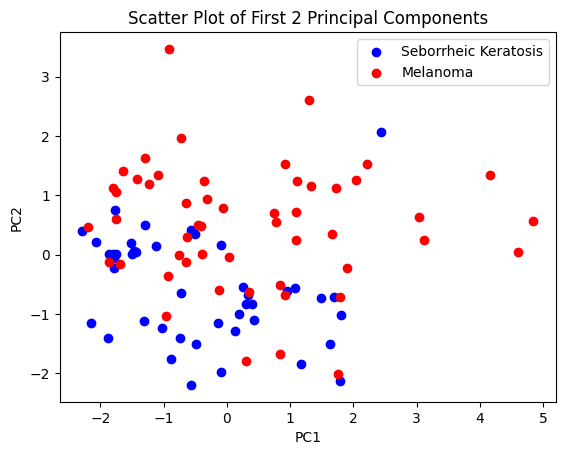

In [16]:
# Extract the output variable
y = data.iloc[:, 0].values

# Apply PCA with 6 main components
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X)

# Analyze the variance ratio of each component
print('Variance ratio of each component:', pca.explained_variance_ratio_)

# Create two separate scatter plots for the two classes
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], c='b', marker='o', label='Seborrheic Keratosis')
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], c='r', marker='o', label='Melanoma')

# Set the axis labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of First 2 Principal Components')

# Add a legend
plt.legend()

plt.show()

# singular_values_ : array, shape (n_components,)
# explained_variance_ : array, shape (n_components,)